In [1]:
#Monte carlo symulacja całki Ito

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T=1.0
N=10000
dt=T/N # krok czaoswy w ruchu Browna W(t+dt)-W(t) 


In [4]:
#Całkujemy z definicji jako suma H(t)*[W(t+dt)-W(t)] gdzie W(t+dt)-W(t) = dW i ma rozklad N(0,dt)
#inicjalizacja wektora dW

#tworzymy wektor N wartosci z rozkladu N(0,1) i skalujemy przez sqrt(dt) zeby wariancja wyszla dt
#to jest wektor przyrostów W(t+dt)-W(t)!
dW=np.sqrt(dt)*np.random.normal(size=N)

#Tworzymy wektor W(t) gdzie kazdy element jest sumą poprzednich dW. bo W(t)=W(t-1) + dW 
W=np.cumsum(dW)
#dodajemy zero na początek bo proces browna startuje od 0
W = np.insert(W, 0, 0)

#mamy dwa wektory dla dW i W. W jest nam potrzebne do obliczenia H(t)=exp(W(t))
#wszystkie elemnty W poza ostatnim. Inaczej numpy nie bedzię mógł przemnożyć H * dW bo wymiary nie bedą się zgadzać
H=np.exp(W[:-1])
#obliczamy wktor przyrostów całki to NIE JEST jeszcze cała trajektoria, gdyż cała trajektoria to wynik dodawania następnych elemntów tego wektora
incremeants= H*dW

#teraz robimy wektor oddający trajektorie i dodajemy zero bo proces zaczyna od 0

trajectory=np.cumsum(incremeants)
trajectory = np.insert(trajectory, 0, 0)




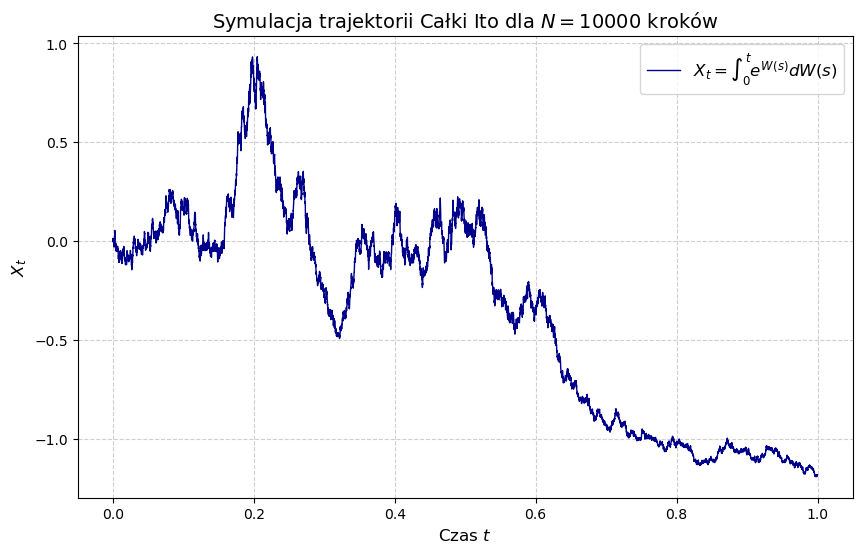

In [5]:
t = np.linspace(0, T, N + 1)

plt.figure(figsize=(10, 6))
plt.plot(t, trajectory, label=r'$X_t = \int_0^t e^{W(s)}dW(s)$', color='darkblue', linewidth=1)
plt.title(f'Symulacja trajektorii Całki Ito dla $N={N}$ kroków', fontsize=14)
plt.xlabel('Czas $t$', fontsize=12)
plt.ylabel('$X_t$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

In [ ]:
#teraz to samo ale zamiast H(t) bedącego procesem stochatsycnzym zrobmy dla determisnitycznego np. H(t)=t^2
dW=np.sqrt(dt)*np.random.normal(size=N)
W=np.cumsum(dW)
W = np.insert(W, 0, 0)

#bez zmian póki co, teraz zmienimay wektor (zmaiast H dajmy R ) na detemrisnitycnzy

R=np.cumsum(np.ones(N))
R=(R*dt)**2


incremeants2=R*dW

result=np.cumsum(incremeants2)
result = np.insert(result, 0, 0)
print(result)

plt.figure(figsize=(10, 6))
plt.plot(t, result, label=r'$X_t = \int_0^t s^2 dW(s)$', color='red', linewidth=1)
plt.title(f'Symulacja trajektorii Całki Ito dla $N={N}$ kroków', fontsize=14)
plt.xlabel('Czas $t$', fontsize=12)
plt.ylabel('$X_t$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()